# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
import json
from datetime import datetime
import PIL as PIL

# Import API key
from api_keys import weather_api_key
API_KEY=weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
totcitydata=(len(cities))
if len(cities)>500:
    print("Okay to Proceed")
else:
    print("Need More City Data")


619
Okay to Proceed


In [4]:
cities

['amberley',
 'hermanus',
 'tuktoyaktuk',
 'bubaque',
 'kavieng',
 'zhigansk',
 'kapaa',
 'rikitea',
 'yellowknife',
 'new norfolk',
 'puerto ayora',
 'hofn',
 'barra velha',
 'vaini',
 'gelibolu',
 'jamestown',
 'new britain',
 'udankudi',
 'guerrero negro',
 'port elizabeth',
 'belushya guba',
 'pevek',
 'satitoa',
 'bowen',
 'nizhneyansk',
 'barentsburg',
 'albany',
 'upernavik',
 'suntar',
 'bredasdorp',
 'hithadhoo',
 'khorramshahr',
 'monrovia',
 'luderitz',
 'deputatskiy',
 'esperance',
 'taolanaro',
 'vostok',
 'saint-pierre',
 'sechura',
 'mataura',
 'qaanaaq',
 'pontes e lacerda',
 'avarua',
 'narsaq',
 'liverpool',
 'sao joao de pirabas',
 'norrkoping',
 'bethel',
 'butaritari',
 'lorengau',
 'shache',
 'busselton',
 'aconibe',
 'bambous virieux',
 'buala',
 'lagoa',
 'sola',
 'oktyabrskiy',
 'marzuq',
 'bluff',
 'provideniya',
 'flinders',
 'cape town',
 'kalabo',
 'pacific grove',
 'tasiilaq',
 'barrow',
 'galiwinku',
 'pisco',
 'khatanga',
 'sorong',
 'lebu',
 'caravelas'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_KEY
response = requests.get(f"{url}&q={city}").json() 
response

{'coord': {'lon': 88.3972, 'lat': 69.4865},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': -11.4,
  'feels_like': -34.24,
  'temp_min': -11.4,
  'temp_max': -11.4,
  'pressure': 1003,
  'humidity': 91,
  'sea_level': 1003,
  'grnd_level': 994},
 'visibility': 7801,
 'wind': {'speed': 15.37, 'deg': 331, 'gust': 24.47},
 'clouds': {'all': 93},
 'dt': 1618544247,
 'sys': {'country': 'RU', 'sunrise': 1618524065, 'sunset': 1618582257},
 'timezone': 25200,
 'id': 1490256,
 'name': 'Talnakh',
 'cod': 200}

In [6]:
city

'talnakh'

In [7]:
#Json weather check for each city and print log
city_name = []
clouds = []
country = []
wind_speed = []
date = []
latitude = []
longitude = []
max_temp = []
humidity = []

counter=1
print(f"Weather Data Processing Initialization")
print(f"______________________________________")
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_KEY
for city in cities:
    try:
        response=requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} of {totcitydata} | {city_record}")
        counter=counter+1

# If no record found "skip" to next call
    except:
        print("City not found. Skipping this location...")
    continue

Weather Data Processing Initialization
______________________________________
Processing Record 1 of 619 | Amberley
Processing Record 2 of 619 | Hermanus
Processing Record 3 of 619 | Tuktoyaktuk
Processing Record 4 of 619 | Bubaque
Processing Record 5 of 619 | Kavieng
Processing Record 6 of 619 | Zhigansk
Processing Record 7 of 619 | Kapaa
Processing Record 8 of 619 | Rikitea
Processing Record 9 of 619 | Yellowknife
Processing Record 10 of 619 | New Norfolk
Processing Record 11 of 619 | Puerto Ayora
Processing Record 12 of 619 | Hofn
Processing Record 13 of 619 | Barra Velha
Processing Record 14 of 619 | Vaini
Processing Record 15 of 619 | Gelibolu
Processing Record 16 of 619 | Jamestown
Processing Record 17 of 619 | New Britain
Processing Record 18 of 619 | Udangudi
Processing Record 19 of 619 | Guerrero Negro
Processing Record 20 of 619 | Port Elizabeth
City not found. Skipping this location...
Processing Record 21 of 619 | Pevek
City not found. Skipping this location...
Processing R

City not found. Skipping this location...
Processing Record 188 of 619 | Walvis Bay
Processing Record 189 of 619 | Singleton
Processing Record 190 of 619 | Northam
Processing Record 191 of 619 | Chui
Processing Record 192 of 619 | At-Bashi
Processing Record 193 of 619 | Novoderevyankovskaya
Processing Record 194 of 619 | Anadyr
Processing Record 195 of 619 | Bengkulu
Processing Record 196 of 619 | Korla
Processing Record 197 of 619 | Klaksvík
Processing Record 198 of 619 | Kaseda-shirakame
Processing Record 199 of 619 | Taoudenni
Processing Record 200 of 619 | Segezha
Processing Record 201 of 619 | Poya
Processing Record 202 of 619 | São Miguel do Araguaia
Processing Record 203 of 619 | Fontem
Processing Record 204 of 619 | Yumen
Processing Record 205 of 619 | Port Pirie
Processing Record 206 of 619 | Samarai
Processing Record 207 of 619 | Bariadi
Processing Record 208 of 619 | Rome
Processing Record 209 of 619 | Viedma
Processing Record 210 of 619 | Harbour Breton
City not found. Skip

Processing Record 370 of 619 | Manado
Processing Record 371 of 619 | Launceston
Processing Record 372 of 619 | Gumdag
Processing Record 373 of 619 | Bayangol
City not found. Skipping this location...
Processing Record 374 of 619 | Kudahuvadhoo
Processing Record 375 of 619 | Adrar
City not found. Skipping this location...
Processing Record 376 of 619 | Kurchum
Processing Record 377 of 619 | Armidale
Processing Record 378 of 619 | Siocon
Processing Record 379 of 619 | Magdalena
Processing Record 380 of 619 | Rock Sound
Processing Record 381 of 619 | La Palma
Processing Record 382 of 619 | Zhezkazgan
Processing Record 383 of 619 | Havøysund
Processing Record 384 of 619 | Hearst
City not found. Skipping this location...
Processing Record 385 of 619 | Ayagoz
Processing Record 386 of 619 | Hong Kong
Processing Record 387 of 619 | Lázaro Cárdenas
Processing Record 388 of 619 | Port Augusta
Processing Record 389 of 619 | Muros
City not found. Skipping this location...
Processing Record 390 of 

Processing Record 556 of 619 | Surab
Processing Record 557 of 619 | La Mata
Processing Record 558 of 619 | Manjeshwar
Processing Record 559 of 619 | Katobu
Processing Record 560 of 619 | Saint-Joseph
Processing Record 561 of 619 | Knysna
City not found. Skipping this location...
Processing Record 562 of 619 | Batemans Bay
Processing Record 563 of 619 | Turaif
Processing Record 564 of 619 | Zhuji
Processing Record 565 of 619 | Joshīmath
Processing Record 566 of 619 | Assiut


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data=pd.DataFrame({"City":city_name,
                        "Cloudiness":clouds,
                        "Country":country,
                        "Date":date,
                        "Humidity":humidity,
                        "Lat":latitude,
                        "Lng":longitude,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed})
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Amberley,1,US,1618544247,75,39.2048,-84.4280,44.01,4.85
1,Hermanus,21,ZA,1618544248,71,-34.4187,19.2345,62.01,13.00
2,Tuktoyaktuk,75,CA,1618544248,85,69.4541,-133.0374,14.00,10.36
3,Bubaque,29,GW,1618544248,75,11.2833,-15.8333,76.15,14.43
4,Kavieng,77,PG,1618544249,73,-2.5744,150.7967,82.71,8.48
...,...,...,...,...,...,...,...,...,...
561,Batemans Bay,60,AU,1618544417,54,-35.7167,150.1833,64.00,5.01
562,Turaif,0,SA,1618544417,33,31.6725,38.6637,59.00,11.50
563,Zhuji,0,CN,1618544418,60,29.7188,120.2423,73.40,4.47
564,Joshīmath,28,IN,1618544418,33,30.5667,79.5667,67.12,3.58


In [10]:
city_data["Humidity"].max()


100

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data.count()


City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#convert unix timestamp to date time - pandas.pydata.org time series/date functionality
city_data["Date"]=pd.to_datetime(city_data["Date"],unit="s")
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_data[["City","Lat","Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
clean_sort=clean_city_data.sort_values(by='City',ascending=True).reset_index(drop=True)
clean_sort


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aberdeen,57.1437,-2.0981,34.00,100,8,5.75,GB,2021-04-16 03:35:20
1,Acapulco de Juárez,16.8634,-99.8901,77.76,69,75,7.29,MX,2021-04-16 03:39:38
2,Acaraú,-2.8856,-40.1200,76.60,89,97,10.76,BR,2021-04-16 03:39:16
3,Aconibe,1.2968,10.9369,67.42,99,100,1.12,GQ,2021-04-16 03:37:42
4,Adrar,20.5022,-10.0711,70.70,26,34,10.89,MR,2021-04-16 03:39:19
...,...,...,...,...,...,...,...,...,...
561,Zabaykal'sk,49.6333,117.3167,41.72,23,100,22.44,RU,2021-04-16 03:40:13
562,Zhangye,38.9342,100.4517,53.78,10,0,2.28,CN,2021-04-16 03:38:48
563,Zhezkazgan,47.8043,67.7144,57.87,31,67,11.14,KZ,2021-04-16 03:39:21
564,Zhigansk,66.7697,123.3711,26.10,87,100,21.90,RU,2021-04-16 03:37:29


In [14]:
clean_sort=clean_sort.rename(columns={"Max Temp":"Max Temp ˚F"})
clean_sort
clean_sort.to_csv('output_data/cities.csv',index=True,header=True)
datadate=((clean_sort.iloc[0,8]))
chartdate=(datadate.strftime("%b %d, %Y"))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

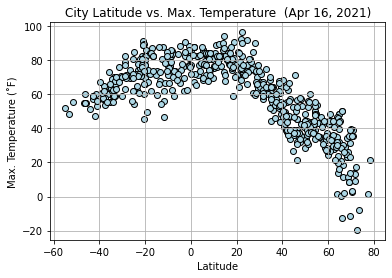

In [15]:
plt.scatter(clean_sort["Lat"],clean_sort["Max Temp ˚F"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Max. Temperature  "+"("+chartdate+")")
plt.ylabel("Max. Temperature (˚F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvsmaxtemp.png")
plt.savefig("output_data/Fig1.png")
plt.show()


## Latitude vs. Humidity Plot

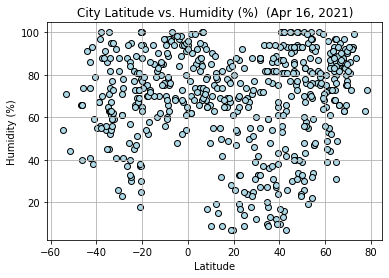

In [16]:
plt.scatter(clean_sort["Lat"],clean_sort["Humidity"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Humidity (%)  "+"("+chartdate+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvshumidity.png")
plt.savefig("output_data/Fig2.png")
plt.show()



## Latitude vs. Cloudiness Plot

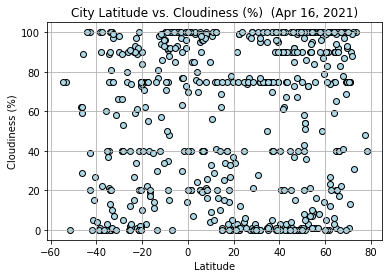

In [17]:
plt.scatter(clean_sort["Lat"],clean_sort["Cloudiness"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Cloudiness (%)  "+"("+chartdate+")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvscloud.png")
plt.savefig("output_data/Fig3.png")
plt.show()



## Latitude vs. Wind Speed Plot

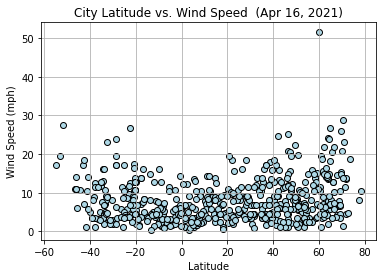

In [18]:
plt.scatter(clean_sort["Lat"],clean_sort["Wind Speed"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("City Latitude vs. Wind Speed  "+"("+chartdate+")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/citylatvsmaxtemp.png")
plt.savefig("output_data/Fig4.png")
plt.show()



## Linear Regression

In [19]:
northhem=clean_sort[clean_sort['Lat']>=0]
southhem=clean_sort[clean_sort['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7824145306853341


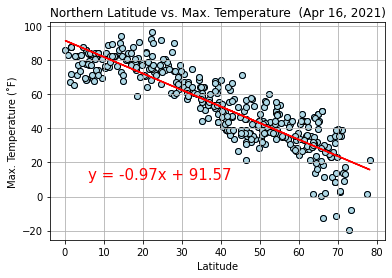

In [20]:
x_values = northhem['Lat']
y_values = northhem['Max Temp ˚F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(northhem["Lat"],northhem["Max Temp ˚F"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("Northern Latitude vs. Max. Temperature  "+"("+chartdate+")")
plt.ylabel("Max. Temperature (˚F)")
plt.xlabel("Latitude")
plt.grid()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/citynorthlatvsmaxtemp.png")
plt.savefig("output_data/Fig5.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.35520566889324723


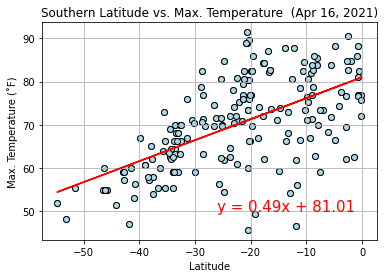

In [21]:
x_values = southhem['Lat']
y_values = southhem['Max Temp ˚F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-26,50),fontsize=15,color="red")

plt.scatter(southhem["Lat"],southhem["Max Temp ˚F"], marker="o", facecolors="lightblue", edgecolors="black",)
plt.title("Southern Latitude vs. Max. Temperature  "+"("+chartdate+")")
plt.ylabel("Max. Temperature (˚F)")
plt.xlabel("Latitude")
plt.grid()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/citynorthlatvsmaxtemp.png")
plt.savefig("output_data/Fig6.png")
plt.show()




####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.029640965634918505


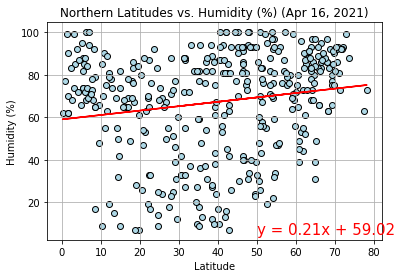

In [22]:
x_values = northhem['Lat']
y_values = northhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=15,color="red")
plt.title("Northern Latitudes vs. Humidity (%) "+"("+chartdate+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/northlatvshumidity.png")
plt.savefig("output_data/Fig7.png")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.071362837382833


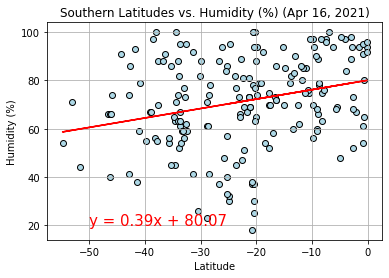

In [42]:
x_values = southhem['Lat']
y_values = southhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Latitudes vs. Humidity (%) "+"("+chartdate+")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/southlatvshumidity.png")
plt.savefig("output_data/Fig8.png")
plt.show()




####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022449637105747745


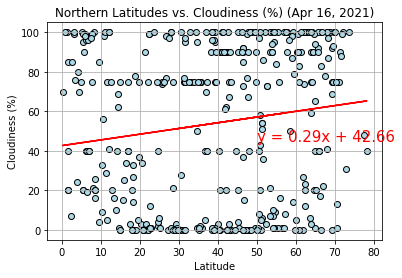

In [24]:
x_values = northhem['Lat']
y_values = northhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.title("Northern Latitudes vs. Cloudiness (%) "+"("+chartdate+")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/northlatvscloudiness.png")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07411279605275255


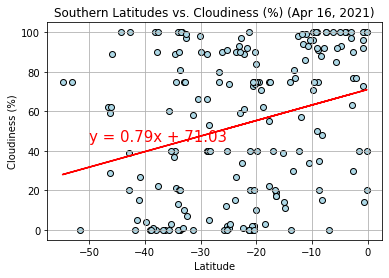

In [43]:
x_values = southhem['Lat']
y_values = southhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
plt.title("Southern Latitudes vs. Cloudiness (%) "+"("+chartdate+")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/southlatvscloudiness.png")
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0745696554817095


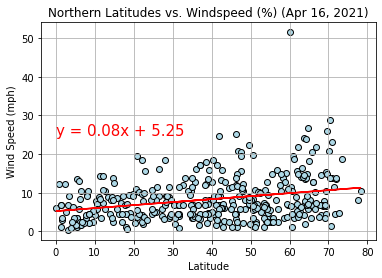

In [26]:
x_values = northhem['Lat']
y_values = northhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title("Northern Latitudes vs. Windspeed (%) "+"("+chartdate+")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/northlatvsWindspeed.png")
plt.savefig("output_data/Fig11.png")
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10277439925256975


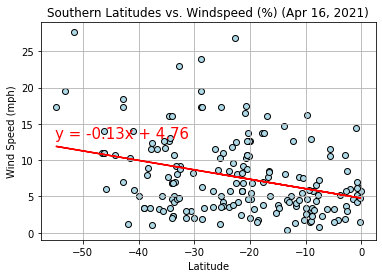

In [27]:
x_values = southhem['Lat']
y_values = southhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="red")
plt.title("Southern Latitudes vs. Windspeed (%) "+"("+chartdate+")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/southlatvsWindspeed.png")
plt.savefig("output_data/Fig12.png")
plt.show()



In [28]:
#Create one single image with multiple plots

In [44]:
from PIL import Image
im1=Image.open("output_data/fig1.png")
im2=Image.open("output_data/fig2.png")
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
get_concat_h(im1, im2).save('output_data/Fig13.jpg')

In [45]:
im3=Image.open("output_data/fig3.png")
im4=Image.open("output_data/fig4.png")
def get_concat_h(im3, im4):
    dst = Image.new('RGB', (im3.width + im4.width, im3.height))
    dst.paste(im3, (0, 0))
    dst.paste(im4, (im3.width, 0))
    return dst
get_concat_h(im3, im4).save('output_data/Fig14.jpg')

In [46]:
im5=Image.open("output_data/fig5.png")
im6=Image.open("output_data/fig6.png")
def get_concat_h(im5, im6):
    dst = Image.new('RGB', (im5.width + im6.width, im5.height))
    dst.paste(im5, (0, 0))
    dst.paste(im6, (im5.width, 0))
    return dst
get_concat_h(im5, im6).save('output_data/Fig15.jpg')

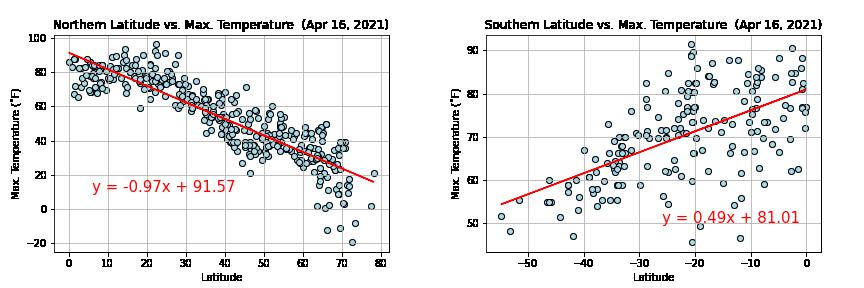

In [47]:
im7=Image.open("output_data/fig7.png")
im8=Image.open("output_data/fig8.png")
def get_concat_h(im7, im8):
    dst = Image.new('RGB', (im7.width + im8.width, im7.height))
    dst.paste(im7, (0, 0))
    dst.paste(im8, (im7.width, 0))
    return dst
get_concat_h(im7, im8).save('output_data/Fig16.jpg')

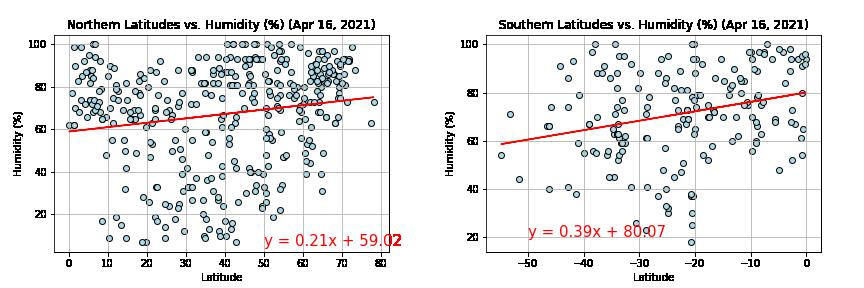

In [48]:
im9=Image.open("output_data/fig9.png")
im10=Image.open("output_data/fig10.png")
def get_concat_h(im9, im10):
    dst = Image.new('RGB', (im9.width + im10.width, im9.height))
    dst.paste(im9, (0, 0))
    dst.paste(im10, (im9.width, 0))
    return dst
get_concat_h(im9, im10).save('output_data/Fig17.jpg')

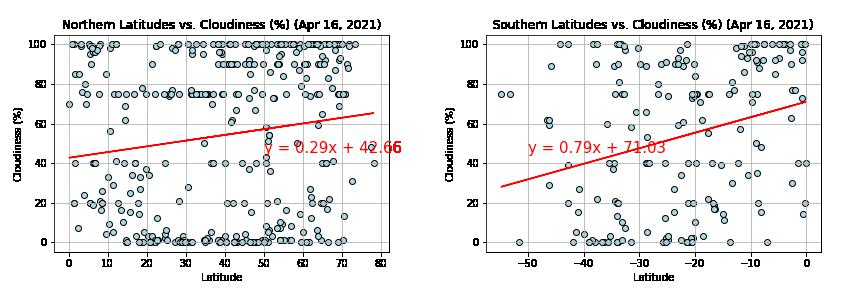

In [49]:
im11=Image.open("output_data/fig11.png")
im12=Image.open("output_data/fig12.png")
def get_concat_h(im11, im12):
    dst = Image.new('RGB', (im11.width + im12.width, im11.height))
    dst.paste(im11, (0, 0))
    dst.paste(im12, (im11.width, 0))
    return dst
get_concat_h(im11, im12).save('output_data/Fig18.jpg')

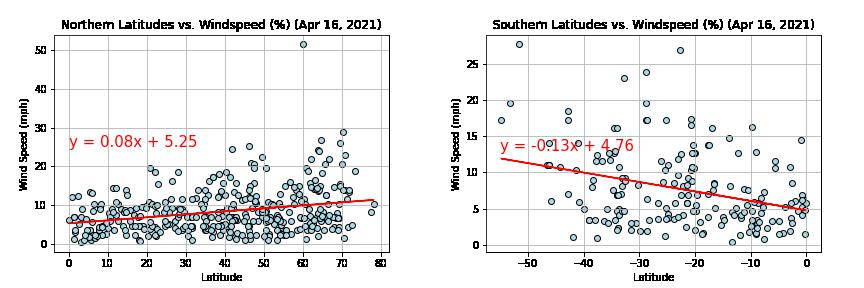

In [50]:
im13=Image.open("output_data/fig13.jpg")
im14=Image.open("output_data/fig14.jpg")
def get_concat_h(im13, im14):
    dst = Image.new('RGB', (im13.width + im14.width, im13.height))
    dst.paste(im13, (0, 0))
    dst.paste(im14, (im13.width, 0))
    return dst
get_concat_h(im13, im14).save('output_data/Fig19.jpg')

In [51]:
im15=Image.open("output_data/fig15.jpg")
im16=Image.open("output_data/fig16.jpg")
def get_concat_h(im15, im16):
    dst = Image.new('RGB', (im15.width + im16.width, im15.height))
    dst.paste(im15, (0, 0))
    dst.paste(im16, (im15.width, 0))
    return dst
get_concat_h(im15, im16).save('output_data/Fig20.jpg')

In [52]:
im17=Image.open("output_data/fig17.jpg")
im18=Image.open("output_data/fig18.jpg")
def get_concat_h(im17, im18):
    dst = Image.new('RGB', (im17.width + im18.width, im17.height))
    dst.paste(im17, (0, 0))
    dst.paste(im18, (im17.width, 0))
    return dst
get_concat_h(im17, im18).save('output_data/Fig21.jpg')

In [53]:
im19=Image.open("output_data/fig19.jpg")
im20=Image.open("output_data/fig20.jpg")
def get_concat_v(im19, im20):
    dst = Image.new('RGB', (im19.width, im19.height + im20.height))
    dst.paste(im19, (0, 0))
    dst.paste(im20, (0, im19.height))
    return dst

get_concat_v(im19, im20).save('output_data/Fig22.jpg')

In [54]:
im21=Image.open("output_data/fig21.jpg")
im22=Image.open("output_data/fig22.jpg")
def get_concat_v(im22, im21):
    dst = Image.new('RGB', (im22.width, im22.height + im21.height))
    dst.paste(im22, (0, 0))
    dst.paste(im21, (0, im22.height))
    return dst

get_concat_v(im22, im21).save('output_data/Fig23.jpg')

# Final Composit of graphs

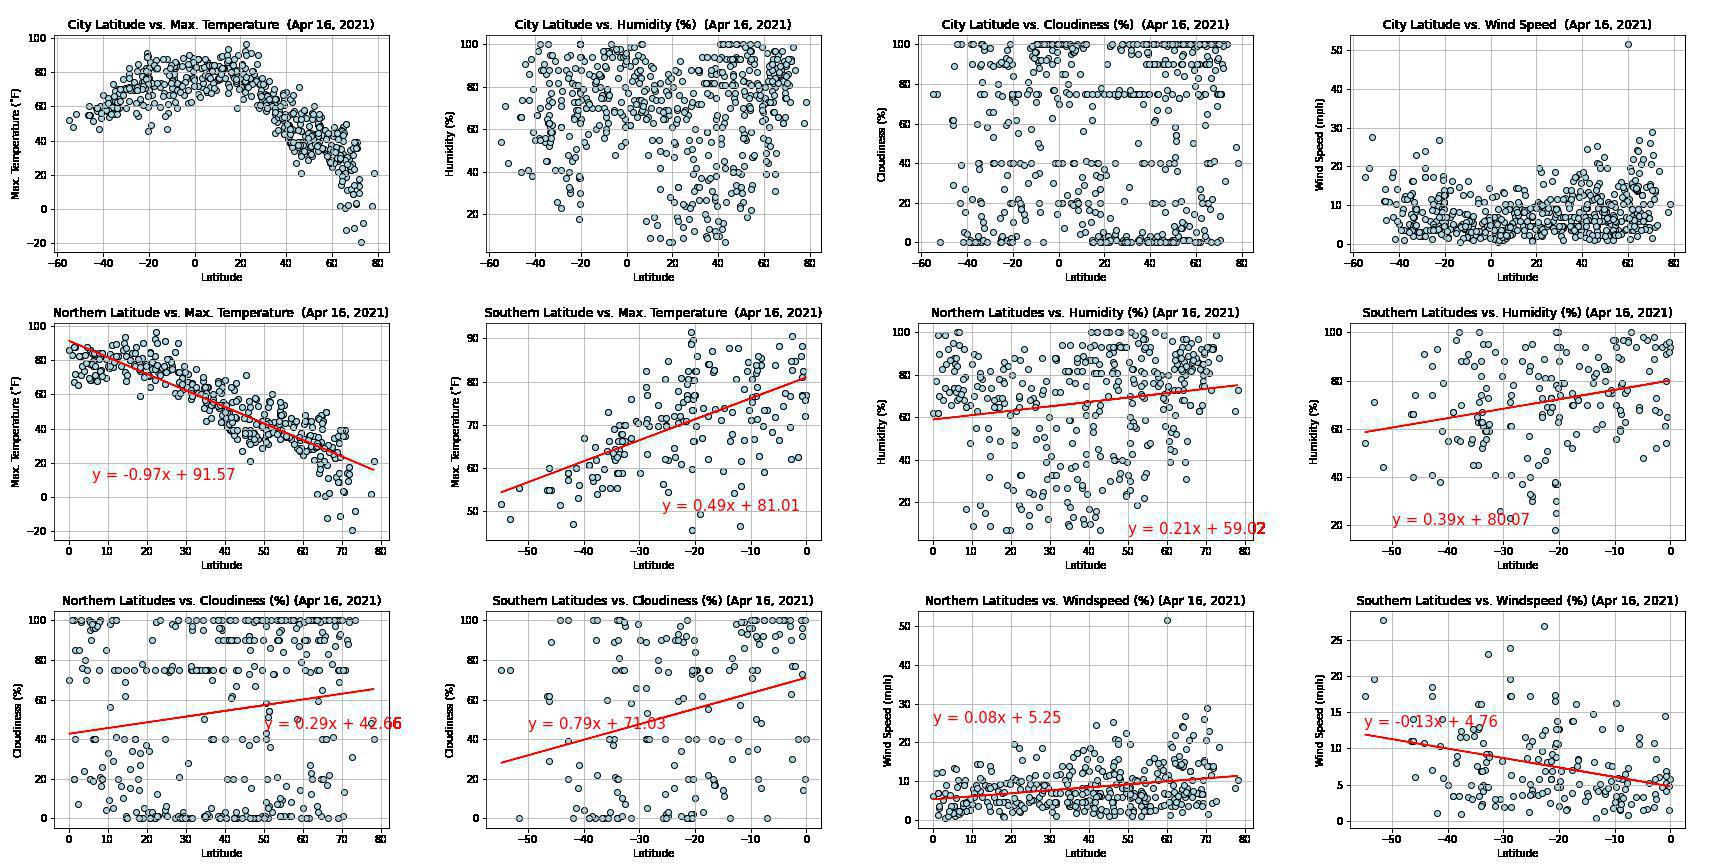